# Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

оценка 2 и ниже — низкий рейтинг;
оценка 4 и ниже — средний рейтинг;
оценка 4.5 и 5 — высокий рейтинг.
Результат классификации запишите в столбец class.

In [14]:
import pandas as pd

In [15]:
from pathlib import Path

cur_path = Path.cwd()
sub_dir = 'ml-latest-small'
path_movies = Path(cur_path, sub_dir, "movies.csv")
path_ratings = Path(cur_path, sub_dir, "ratings.csv")

In [16]:
df_movies = pd.read_csv(path_movies)
df_ratings = pd.read_csv(path_ratings)

In [306]:
# df_movies.head()

In [307]:
# df_ratings.head()

In [19]:
# Параметры классификации
# можно просто переменными. Но предполагаем, что в продакшне это будет хранится 
# в каких-то относительно статичных табличках-классификаторах. Имитируем через dict
# да и вообще, вдруг "обзывалки" захочется поменять
# интуиция подсказывает, что это вообще может быть не словарем, а классом.
classifier_rating = {
    # эта оценка и ниже — низкий рейтинг
    'low_border' : '2',
    'low_border_name' : 'низкий',
    # эта оценка и ниже — средний рейтинг (на самом деле, ниже до 2 не включительно)
    'middle_border' : '4', 
    'middle_border_name' : 'средний',
    # эти оценки - высокий рейтниг (предполагаем, что данные не содержат 4.6 или 5.1 или >5)
    # несистемные критерии - наше всё. Поэтому тут список
    'high_border' : [4.5, 5],
    'high_border_name' : 'высокий'
}


def classify_by_rating(rating, classifier_rating): # порядок переменных из логики "что" -> "как"
    '''
    классифицирует фильмы из материалов занятия по правилам:

    оценка 2 и ниже — низкий рейтинг; 
    оценка 4 и ниже — средний рейтинг; 
    оценка 4.5 и 5 — высокий рейтинг. 

    результат классификации записывается в столбец class.
    '''
    res = 'NaN'
    if rating <= float(classifier_rating['low_border']):
        res = classifier_rating['low_border_name']
    # это условие второе, поэтому ниже 2 в него не попадет
    elif rating <= float(classifier_rating['middle_border']):
        res = classifier_rating['middle_border_name']
    # системная классификация? Не, не слышал. Держите список
    elif rating in classifier_rating['high_border']:
        res = classifier_rating['high_border_name']

    return res

# ранжируем
df_ratings['rate_level'] = df_ratings['rating'].apply(classify_by_rating, args = ([classifier_rating]))

# любуемся

# радости нет предела, нашел функцию display
# смотрим на "красоту"

display('спрэд по рейтингам', df_ratings.groupby('rate_level').count())
display('полный список', df_ratings)
display('только высокий рейтинг', df_ratings[(df_ratings.rating >= 4.5)])

# а вдруг такое возможно, проверим
display('существуют ли рейтинги > 5', df_ratings[(df_ratings.rating > 5)])

'спрэд по рейтингам'

,userId,movieId,rating,timestamp
rate_level,,,,
высокий,22818,22818,22818,22818
низкий,13385,13385,13385,13385
средний,63801,63801,63801,63801


'полный список'

,userId,movieId,rating,timestamp,rate_level
0,1,31,2.5,1260759144,средний
1,1,1029,3.0,1260759179,средний
2,1,1061,3.0,1260759182,средний
3,1,1129,2.0,1260759185,низкий
4,1,1172,4.0,1260759205,средний
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,средний
100000,671,6269,4.0,1065149201,средний
100001,671,6365,4.0,1070940363,средний
100002,671,6385,2.5,1070979663,средний


'только высокий рейтинг'

,userId,movieId,rating,timestamp,rate_level
21,2,17,5.0,835355681,высокий
22,2,39,5.0,835355604,высокий
29,2,150,5.0,835355395,высокий
37,2,222,5.0,835355840,высокий
44,2,265,5.0,835355697,высокий
...,...,...,...,...,...
99981,671,4973,4.5,1064245471,высокий
99982,671,4993,5.0,1064245483,высокий
99989,671,5445,4.5,1064891627,высокий
99994,671,5952,5.0,1063502716,высокий


'существуют ли рейтинги > 5'

,userId,movieId,rating,timestamp,rate_level


# Задание 2
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

1
2
3
4
5
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [20]:
import pandas as pd
from pathlib import Path

cur_path = Path.cwd()
sub_dir = 'ml-latest-small'
path_keys = Path(cur_path, sub_dir, "keywords.csv")

In [156]:
df = pd.read_csv(path_keys)
display(df.head())
display(df.info())

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  100000 non-null  object
 1   shows    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


None

In [22]:
df.query('keyword == "москва"')

,keyword,shows
1259,москва,153050


### Задание 2 Подходы к Решению

Два варианта:
 1) "в лоб" построчной фунцкцией - ресурсоемко, 
     так как в любом случае проход по всем строкам DF
     и в каждой строке max(9) поисков. При хужшем раскладе 9 * len(DF)
 2) через merge. Join по идее должен быть оптимизирован именно для множеств. Замерим, посмотрим

 СПОЙЛЕР
 Замеры времени (Wall time) в ms: 
 * В1 -> (150, 200) 
 * В2 -> (58, 64) (full join)
 * В2' -> (80, 90) (left join на базовый DF)


In [174]:
# инициализация классификатора
classifier_geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

### Задание 2 Решение 1 (построчная функция)

In [159]:
# 1) "в лоб" построчной фунцкцией 

def classify_by_geo(key, classifier):
    '''
        
    Частный случай (как требует задание):
        Классификатор, который каждой строке сможет выставить 
        географическую принадлежность определённому региону. 
        Т. е. если поисковый запрос содержит название города региона, 
        то в столбце ‘region’ пишется название этого региона.

    Общий случай:
        Классификатор - любой словарь, где 
            ключ = классификация
            значение = список значений относимых к классификации ключа
    '''
    res_class = 'undefined'
    
    for idx, value in classifier.items():
        if key.lower() in value:
            res_class = idx
            break
            
    return res_class

In [165]:
%%time

classified_column_name = 'region'
df[classified_column_name] = df['keyword'].apply(classify_by_geo, args = ([classifier_geo_data]))
display(df)
display(df[(df['region'] != 'undefined')])

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined
...,...,...,...
99995,эльдорадо старый оскол,3705,undefined
99996,frigate для firefox,3630,undefined
99997,укрсиб,3630,undefined
99998,погода в ялте на неделю,3688,undefined


,keyword,shows,region
1259,москва,153050,Центр
5858,владивосток,43038,Дальний Восток
6075,ярославль,41720,Центр
8977,мурманск,29984,Северо-Запад
9084,хабаровск,29655,Дальний Восток
11222,псков,24885,Северо-Запад
11785,тула,23898,Центр
20823,петербург,14859,Северо-Запад
21445,сахалин,14494,Дальний Восток


CPU times: total: 125 ms
Wall time: 203 ms


### Задание 2 Решение 2 (через merge)

In [168]:
%%time

# 1) создать DF плоский классификатор (не словарь списков)
# 2) merge классификатора с DF, который надо классифицировать 

# 1) создать DF плоский классификатор (не словарь списков)
df_classifier_T = (pd.DataFrame.from_dict(classifier_geo_data)
                   .T
                   .reset_index()
                  ).melt(id_vars = 'index') #разворот в плоский вид "один атрибут, одно значение"
display(df_classifier_T) #лишние столбики, но в другой раз придумаю что-то получше

# 2) merge классификатора с DF, который надо классифицировать 
df_classified = df.merge(
    df_classifier_T,
    how='inner', 
    left_on='keyword', 
    right_on='value'
)

display(df_classified[['keyword','shows','region']])

,index,variable,value
0,Центр,0,москва
1,Северо-Запад,0,петербург
2,Дальний Восток,0,владивосток
3,Центр,1,тула
4,Северо-Запад,1,псков
5,Дальний Восток,1,сахалин
6,Центр,2,ярославль
7,Северо-Запад,2,мурманск
8,Дальний Восток,2,хабаровск


,keyword,shows,region
0,москва,153050,Центр
1,владивосток,43038,Дальний Восток
2,ярославль,41720,Центр
3,мурманск,29984,Северо-Запад
4,хабаровск,29655,Дальний Восток
5,псков,24885,Северо-Запад
6,тула,23898,Центр
7,петербург,14859,Северо-Запад
8,сахалин,14494,Дальний Восток


CPU times: total: 15.6 ms
Wall time: 61.5 ms


In [190]:
%%time

# из любви к искусству пробежим по всем строкам базового DF (чтобы тест по смыслу был ближе к построчному перебору)

df_classified = df.merge(
    df_classifier_T,
    how='left', 
    left_on='keyword', 
    right_on='value'
)

display(df_classified[['keyword','shows','region']])
display(df_classified[(df_classified['region'] != 'undefined')])

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined
...,...,...,...
99995,эльдорадо старый оскол,3705,undefined
99996,frigate для firefox,3630,undefined
99997,укрсиб,3630,undefined
99998,погода в ялте на неделю,3688,undefined


,keyword,shows,region,index,variable,value
1259,москва,153050,Центр,Центр,0,москва
5858,владивосток,43038,Дальний Восток,Дальний Восток,0,владивосток
6075,ярославль,41720,Центр,Центр,2,ярославль
8977,мурманск,29984,Северо-Запад,Северо-Запад,2,мурманск
9084,хабаровск,29655,Дальний Восток,Дальний Восток,2,хабаровск
11222,псков,24885,Северо-Запад,Северо-Запад,1,псков
11785,тула,23898,Центр,Центр,1,тула
20823,петербург,14859,Северо-Запад,Северо-Запад,0,петербург
21445,сахалин,14494,Дальний Восток,Дальний Восток,1,сахалин


CPU times: total: 46.9 ms
Wall time: 83.7 ms


# Задание 3 (бонусное)

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010 года.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

* для каждой строки пройдите по всем годам списка years;
* если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
* если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
* Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [204]:
import pandas as pd

In [205]:
from pathlib import Path

cur_path = Path.cwd()
sub_dir = 'ml-latest-small'
path_movies = Path(cur_path, sub_dir, "movies.csv")
path_ratings = Path(cur_path, sub_dir, "ratings.csv")

In [206]:
df_movies = pd.read_csv(path_movies)
df_ratings = pd.read_csv(path_ratings)

In [207]:
display(df_movies.head(), df_ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [253]:
# В переменную years запишите список из всех годов с 1950 по 2010 года.
years = tuple(range(1950, 2023 + 1, 1)) # по заданию 2010 год, но будем жить сегодняшним днем?

# 1.

# для каждой строки пройдите по всем годам списка years;
# проход по строкам будет вне функции
def production_year(str_to_search, years):
    '''
    Каждой строке из названия фильма выставляет год выпуска. 
    Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому алгоритм:
        1. для каждой строки пройдите по всем годам списка years;
        2. если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
        3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
    '''
    res = '1900'
    for y in years:
        if str(y) in str_to_search:
            res = y
            break
            
    return res

# 4. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.
print('Год выпуска записан в year')
df_movies['year'] = df_movies['title'].apply(production_year, args = [years])
display(df_movies)

# Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.
print('Средний рейтинг всех фильмов по годам')
df_movies_avg_rate = (
    df_movies.merge(df_ratings,
                   left_on = 'movieId',
                   right_on = 'movieId')
    .groupby('year')
    .agg({'rating' : 'mean'})
    .reset_index()
    .sort_values('rating', ascending = False)
)

display(df_movies_avg_rate)

Год выпуска записан в year


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1900


Средний рейтинг всех фильмов по годам


,year,rating
7,1957,4.014241
22,1972,4.011136
2,1952,4.000000
4,1954,3.994220
1,1951,3.983539
...,...,...
61,2011,3.401188
65,2015,3.371028
63,2013,3.357399
50,2000,3.356104


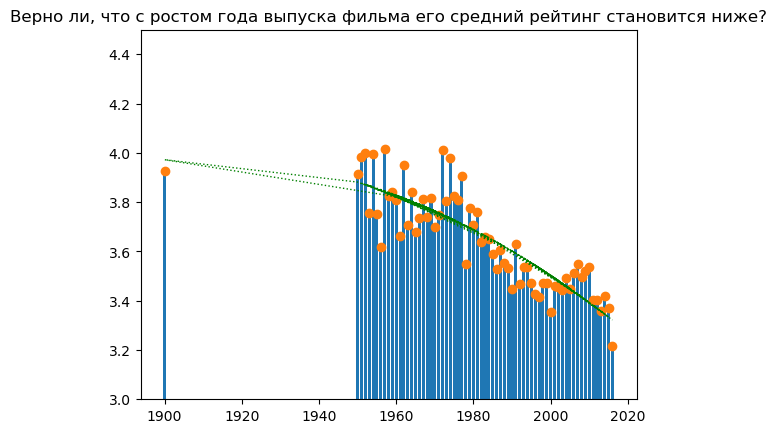

In [305]:
import matplotlib.pyplot as plt
import numpy as np
 

x = pd.to_numeric(df_movies_avg_rate['year'])
y = df_movies_avg_rate['rating']

plt.bar(x, y)
plt.title('Верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже?')
# наглядный масштаб подобран вручную
plt.ylim([3, 4.5])

# Линия тренда для наглядности
# нашел в интернетах. Переписывать не стал

#create scatterplot
plt.scatter (x, y)

#calculate equation for trendline
z = np.polyfit (x, y, 2)
p = np.poly1d (z)

#add trendline to plot
plt.plot (x, p(x), 
          color = 'g', 
          linewidth = 1, 
          linestyle = 'dotted') 

plt.show()